# **Data Exploration:**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#my file name - Marijuana_Arrests.csv
file_path = 'Marijuana_Arrests.csv'
data = pd.read_csv(file_path)

Understanding of Data

In [2]:

#Understanding of Data
print("Shape of the data (rows, columns):", data.shape)
print("\nFirst few rows of the dataset:\n", data.head())
print("\nData Types:\n", data.dtypes)

Shape of the data (rows, columns): (13063, 27)

First few rows of the dataset:
                                    TYPE ADULT_JUVENILE  YEAR  \
0                            Possession          Adult  2012   
1                            Possession          Adult  2012   
2                            Possession          Adult  2012   
3                            Possession          Adult  2012   
4  Possession with intent to distribute          Adult  2012   

                 DATETIME                              CCN   AGE  \
0  2012/01/01 06:00:00+00                 b';\xc8k~\xa4iJ'  20.0   
1  2012/01/01 06:00:00+00                 b';\xc8k~\xa4iJ'  23.0   
2  2012/01/01 06:00:00+00           b't6\xa0\xac\xec`\xa4'  46.0   
3  2012/01/01 09:35:00+00        b'\xbe\x1d\xa7\xf5\xffWx'  30.0   
4  2012/01/02 19:40:00+00  b'\xbb\xc0\x8e\x94\x81\xac\xcd'  29.0   

  OFFENSE_DISTRICT  OFFENSE_PSA  OFFENSE_BLOCKX  OFFENSE_BLOCKY  ...  \
0               5D        501.0        399700.0       

Summarization Statistics

In [3]:
# Summarization Statistics
# Descriptive statistics for numerical features
print("\nSummary statistics for numerical columns:\n", data.describe())

# Descriptive statistics for categorical features
print("\nSummary statistics for categorical columns:\n", data.describe(include='object'))


Summary statistics for numerical columns:
                YEAR           AGE   OFFENSE_PSA  OFFENSE_BLOCKX  \
count  13063.000000  12466.000000  13036.000000    12461.000000   
mean    2014.644339     29.571394    471.557533   400548.800257   
std        2.704414     10.264332    190.337531     3037.910474   
min     2012.000000     18.000000    101.000000   390300.000000   
25%     2012.000000     22.000000    305.000000   398100.000000   
50%     2014.000000     26.000000    506.000000   400400.000000   
75%     2017.000000     34.000000    607.000000   402200.000000   
max     2021.000000     81.000000    708.000000   407800.000000   

       OFFENSE_BLOCKY  ARREST_BLOCKX  ARREST_BLOCKY      OBJECTID  
count    12461.000000   1.209300e+04   12093.000000  13063.000000  
mean    136491.782361   4.005846e+05  136551.352022  19012.000000  
std       3705.734553   7.988281e+03    4533.415194   3771.107618  
min     127900.000000   3.903000e+05  128000.000000  12481.000000  
25%     1343

Visualizing the Data

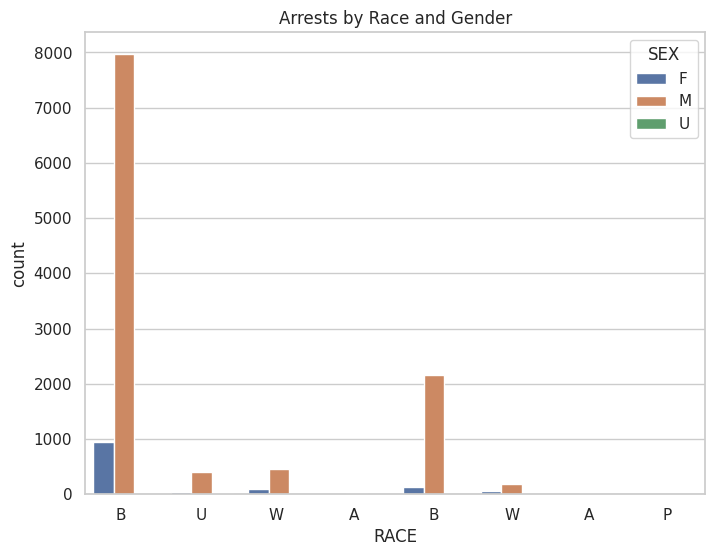

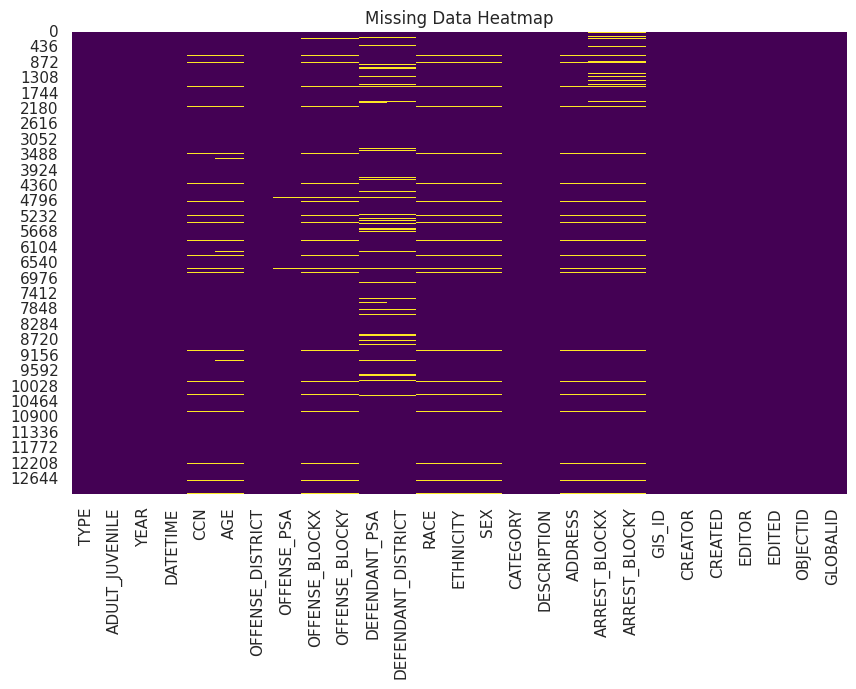

In [4]:


#Visualizing the Data
sns.set(style="whitegrid")

# Arrests by Race and Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='RACE', hue='SEX', data=data)
plt.title('Arrests by Race and Gender')
plt.show()

# Visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

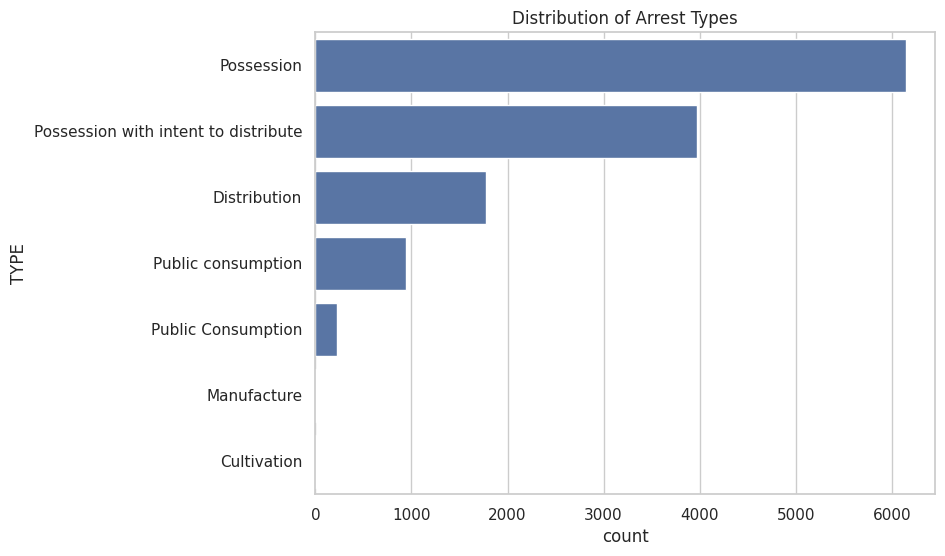

In [5]:

# Distribution of arrest types
plt.figure(figsize=(8, 6))
sns.countplot(data['TYPE'])
plt.title('Distribution of Arrest Types')
plt.show()



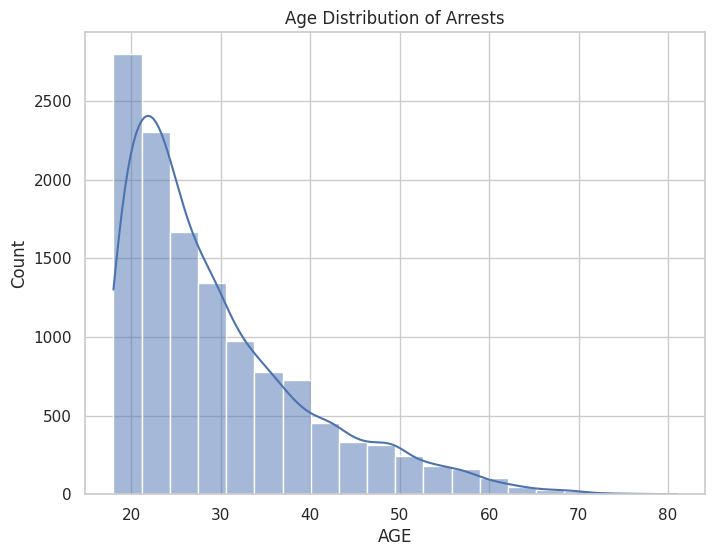

In [6]:

# Distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data['AGE'].dropna(), kde=True, bins=20)
plt.title('Age Distribution of Arrests')
plt.show()

<ipython-input-7-16545bc90f33>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEX', data=data, palette='coolwarm')


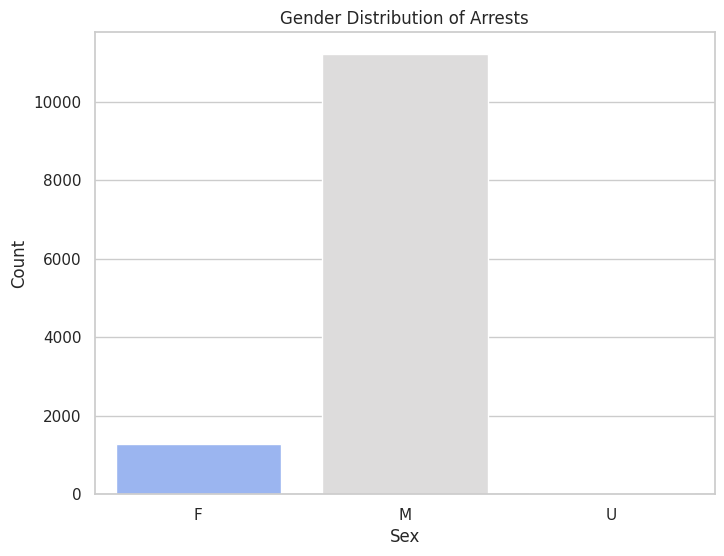

<ipython-input-7-16545bc90f33>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OFFENSE_PSA', data=data, palette='dark')


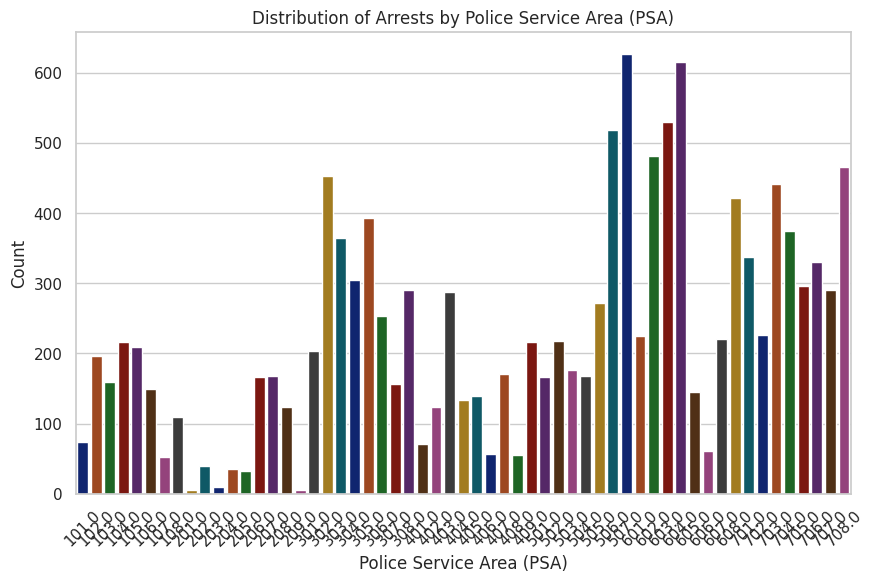

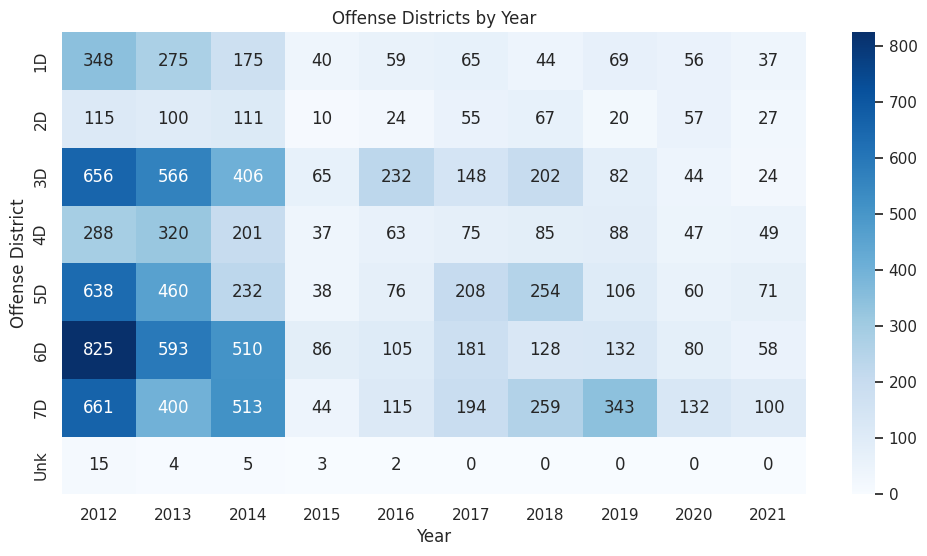

In [7]:

# Visualize Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='SEX', data=data, palette='coolwarm')
plt.title('Gender Distribution of Arrests')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()



# Bar Plot for Offense PSA (Police Service Area)
plt.figure(figsize=(10, 6))
sns.countplot(x='OFFENSE_PSA', data=data, palette='dark')
plt.title('Distribution of Arrests by Police Service Area (PSA)')
plt.xlabel('Police Service Area (PSA)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Heatmap for Offense District and Year (Distribution)
plt.figure(figsize=(12, 6))
offense_district_year = pd.crosstab(data['OFFENSE_DISTRICT'], data['YEAR'])
sns.heatmap(offense_district_year, cmap='Blues', annot=True, fmt='d')
plt.title('Offense Districts by Year')
plt.xlabel('Year')
plt.ylabel('Offense District')
plt.show()


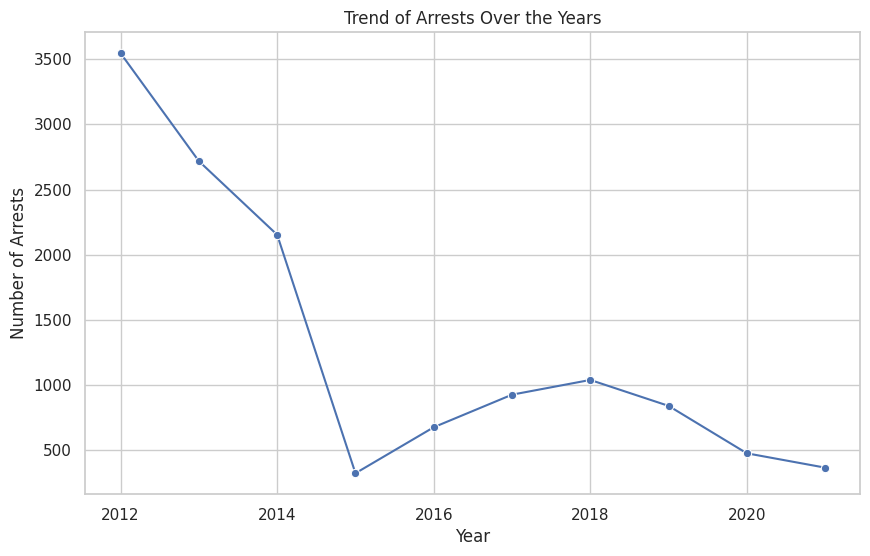

In [8]:

#  Line Plot for Arrest Trend over Time (Grouped by Year)
plt.figure(figsize=(10, 6))
arrests_per_year = data.groupby('YEAR').size()
sns.lineplot(x=arrests_per_year.index, y=arrests_per_year.values, marker='o', color='b')
plt.title('Trend of Arrests Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.grid(True)
plt.show()

<ipython-input-9-33bb1bef7710>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OFFENSE_DISTRICT', data=data, palette='muted')


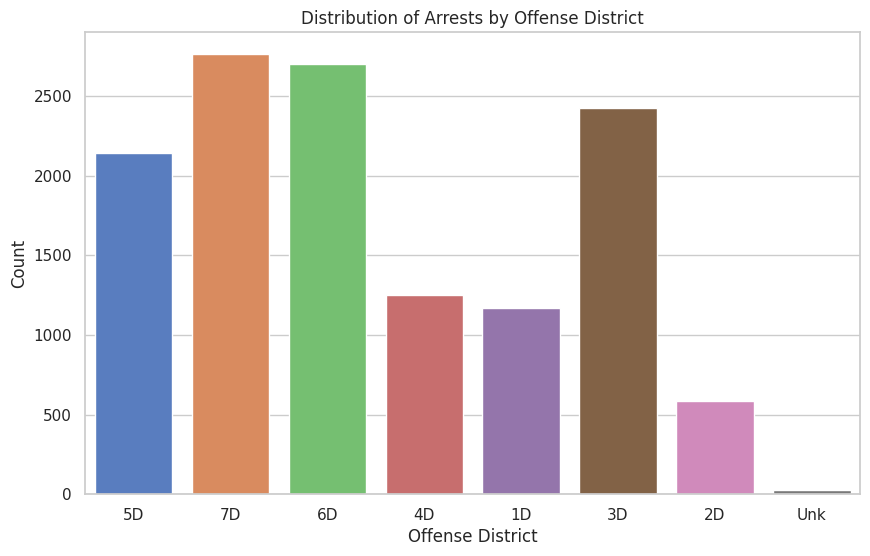

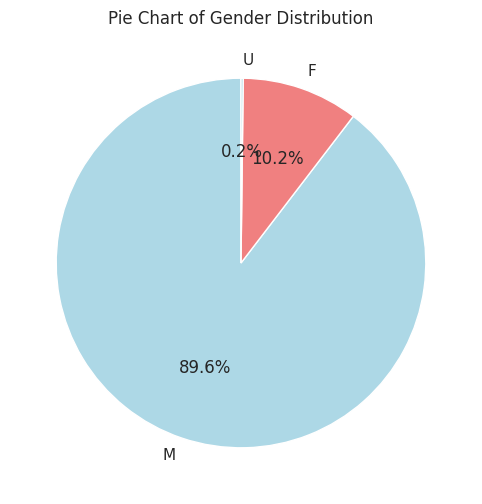

In [9]:

#  Visualize Offense District Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='OFFENSE_DISTRICT', data=data, palette='muted')
plt.title('Distribution of Arrests by Offense District')
plt.xlabel('Offense District')
plt.ylabel('Count')
plt.show()

#  Pie Chart for Gender Distribution
gender_counts = data['SEX'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Pie Chart of Gender Distribution')
plt.show()

<ipython-input-10-871fdea1ff39>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ETHNICITY', data=data, palette='Set2')


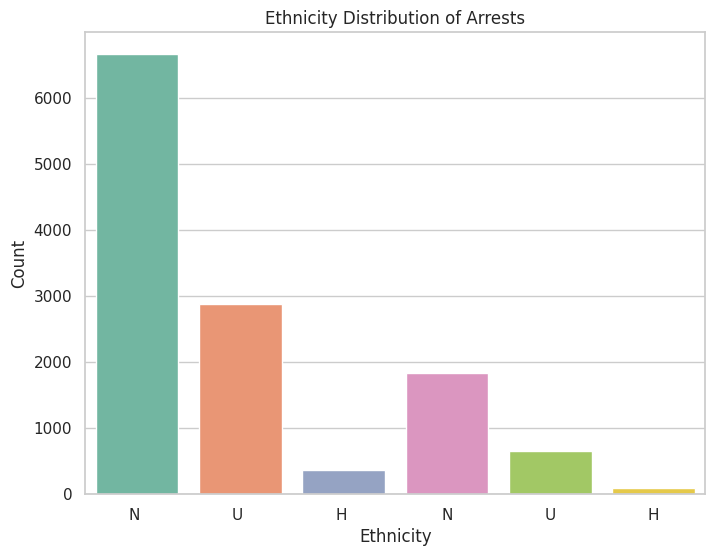

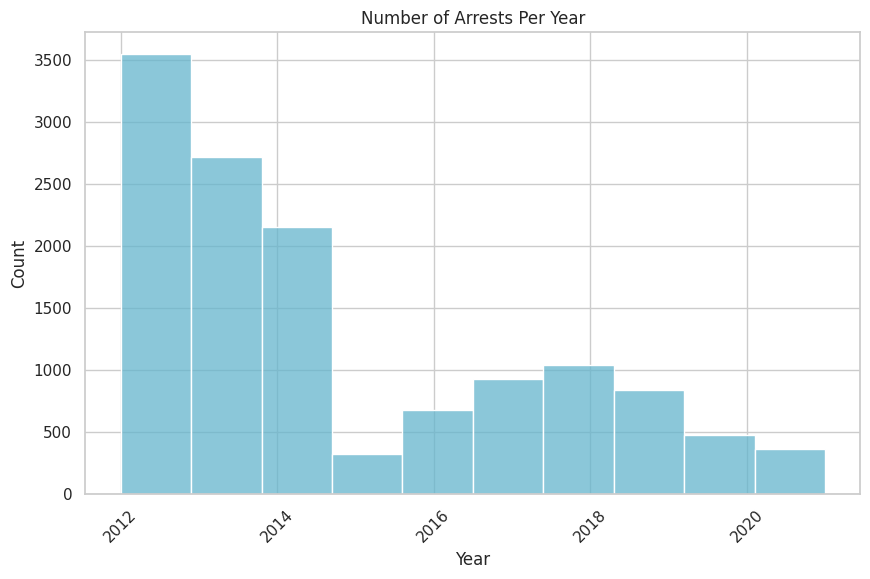

In [10]:

# Visualize Ethnicity Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='ETHNICITY', data=data, palette='Set2')
plt.title('Ethnicity Distribution of Arrests')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

#  Visualize Yearly Arrest Trend
plt.figure(figsize=(10, 6))
sns.histplot(data['YEAR'], kde=False, bins=10, color='c')
plt.title('Number of Arrests Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Identify data problems

In [11]:
# Checking for missing values
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print("Missing Data Overview:")
print(missing_df)



Missing Data Overview:
                    Missing Values  Percentage
TYPE                             0    0.000000
ADULT_JUVENILE                   0    0.000000
YEAR                             0    0.000000
DATETIME                         0    0.000000
CCN                            553    4.233331
AGE                            597    4.570160
OFFENSE_DISTRICT                 0    0.000000
OFFENSE_PSA                     27    0.206691
OFFENSE_BLOCKX                 602    4.608436
OFFENSE_BLOCKY                 602    4.608436
DEFENDANT_PSA                  735    5.626579
DEFENDANT_DISTRICT             700    5.358647
RACE                           553    4.233331
ETHNICITY                      553    4.233331
SEX                            553    4.233331
CATEGORY                         0    0.000000
DESCRIPTION                      0    0.000000
ADDRESS                        582    4.455332
ARREST_BLOCKX                  970    7.425553
ARREST_BLOCKY                  970   

In [12]:

# Checking for duplicate records
duplicates = data.duplicated()
duplicate_count = duplicates.sum()
print(f"\nNumber of duplicate records: {duplicate_count}")

# If there are duplicates we find this
if duplicate_count > 0:
    print("\nDuplicate Records:")
    print(data[duplicates])


Number of duplicate records: 0


<ipython-input-13-30e1d93eb872>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['AGE'], palette="Set2")


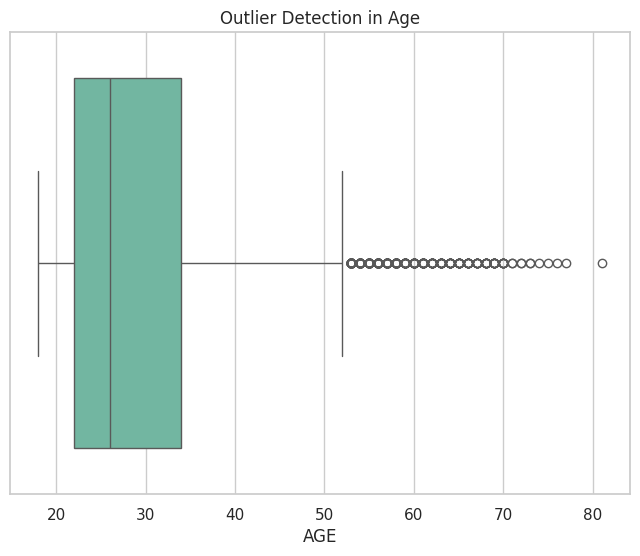

<ipython-input-13-30e1d93eb872>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['YEAR'], palette="Set1")


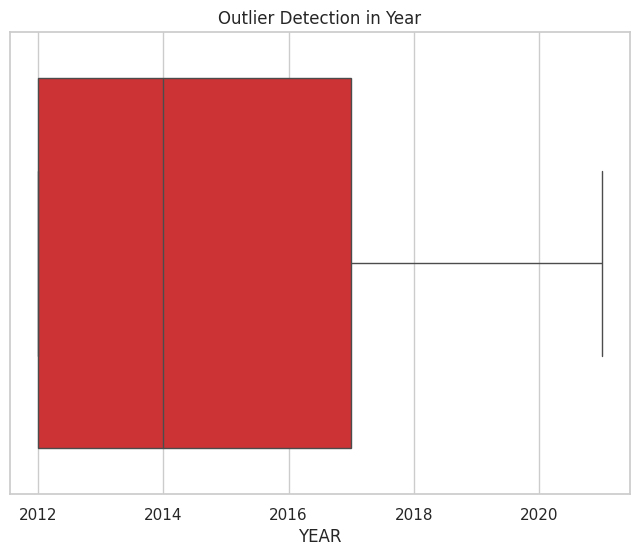


Statistical Summary of Numerical Columns:
                AGE          YEAR
count  12466.000000  13063.000000
mean      29.571394   2014.644339
std       10.264332      2.704414
min       18.000000   2012.000000
25%       22.000000   2012.000000
50%       26.000000   2014.000000
75%       34.000000   2017.000000
max       81.000000   2021.000000


In [13]:

# Detecting outliers using boxplots for numerical columns (like AGE, YEAR)
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier detection in AGE
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['AGE'], palette="Set2")
plt.title('Outlier Detection in Age')
plt.show()

# Outlier detection in YEAR
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['YEAR'], palette="Set1")
plt.title('Outlier Detection in Year')
plt.show()

# Statistical summary of the numerical columns
print("\nStatistical Summary of Numerical Columns:")
print(data[['AGE', 'YEAR']].describe())


# **Data Preprocessing:**

**Cleaning**

Check for Missing Values

In [14]:
#Check for Missing Values
print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 TYPE                    0
ADULT_JUVENILE          0
YEAR                    0
DATETIME                0
CCN                   553
AGE                   597
OFFENSE_DISTRICT        0
OFFENSE_PSA            27
OFFENSE_BLOCKX        602
OFFENSE_BLOCKY        602
DEFENDANT_PSA         735
DEFENDANT_DISTRICT    700
RACE                  553
ETHNICITY             553
SEX                   553
CATEGORY                0
DESCRIPTION             0
ADDRESS               582
ARREST_BLOCKX         970
ARREST_BLOCKY         970
GIS_ID                  0
CREATOR                 0
CREATED                 0
EDITOR                  0
EDITED                  0
OBJECTID                0
GLOBALID                0
dtype: int64


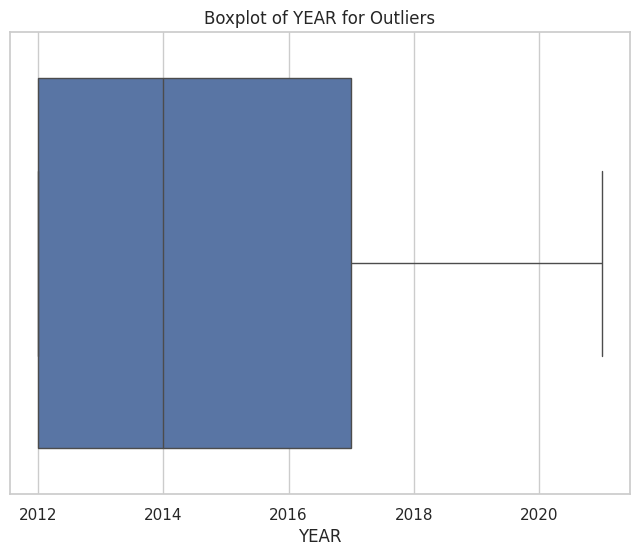


YEAR column statistics:
 count    13063.000000
mean      2014.644339
std          2.704414
min       2012.000000
25%       2012.000000
50%       2014.000000
75%       2017.000000
max       2021.000000
Name: YEAR, dtype: float64


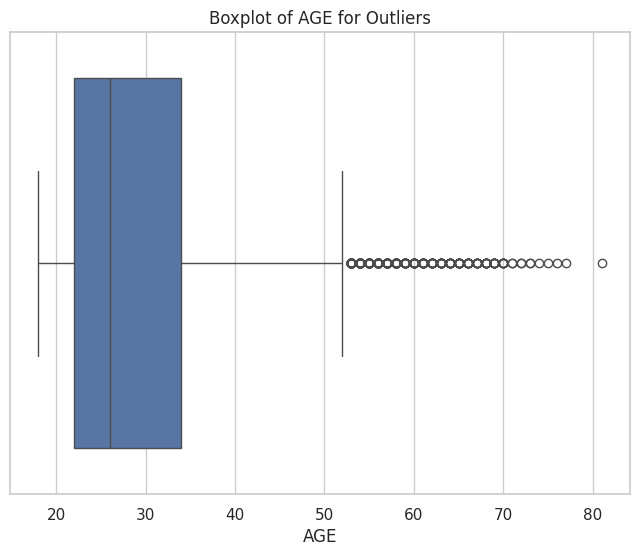


AGE column statistics:
 count    12466.000000
mean        29.571394
std         10.264332
min         18.000000
25%         22.000000
50%         26.000000
75%         34.000000
max         81.000000
Name: AGE, dtype: float64


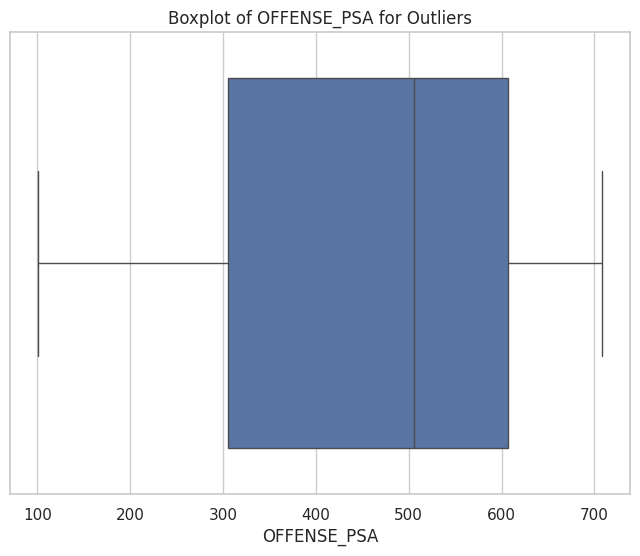


OFFENSE_PSA column statistics:
 count    13036.000000
mean       471.557533
std        190.337531
min        101.000000
25%        305.000000
50%        506.000000
75%        607.000000
max        708.000000
Name: OFFENSE_PSA, dtype: float64


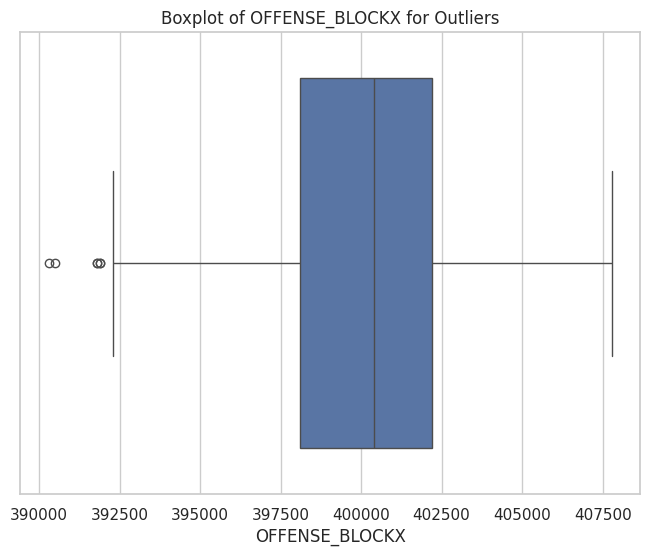


OFFENSE_BLOCKX column statistics:
 count     12461.000000
mean     400548.800257
std        3037.910474
min      390300.000000
25%      398100.000000
50%      400400.000000
75%      402200.000000
max      407800.000000
Name: OFFENSE_BLOCKX, dtype: float64


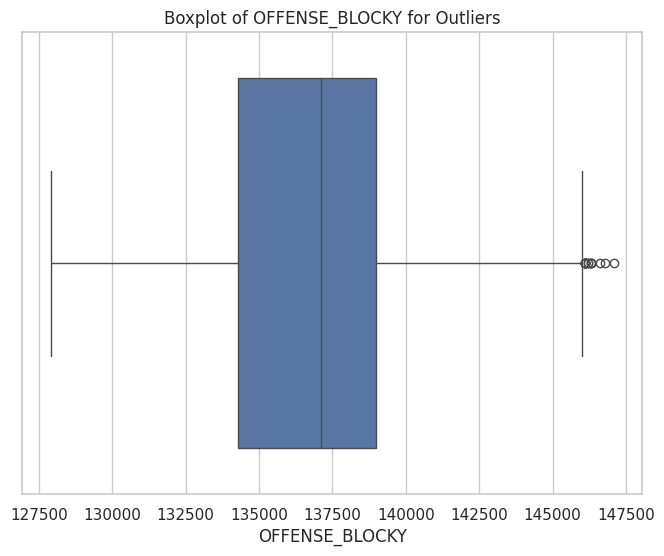


OFFENSE_BLOCKY column statistics:
 count     12461.000000
mean     136491.782361
std        3705.734553
min      127900.000000
25%      134300.000000
50%      137100.000000
75%      139000.000000
max      147100.000000
Name: OFFENSE_BLOCKY, dtype: float64


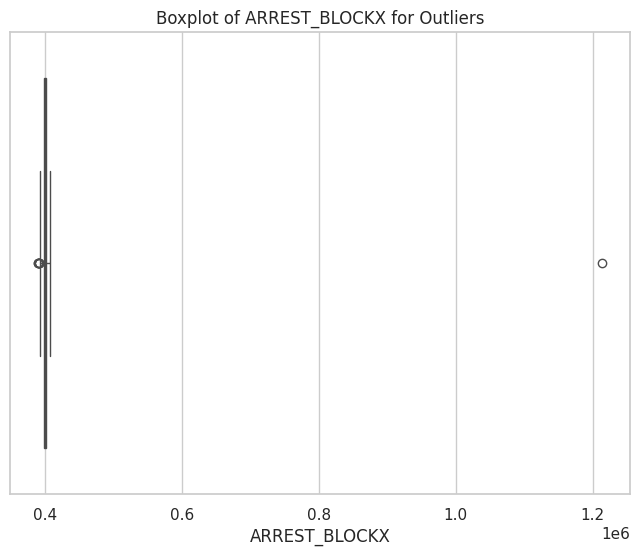


ARREST_BLOCKX column statistics:
 count    1.209300e+04
mean     4.005846e+05
std      7.988281e+03
min      3.903000e+05
25%      3.981000e+05
50%      4.004000e+05
75%      4.022000e+05
max      1.213100e+06
Name: ARREST_BLOCKX, dtype: float64


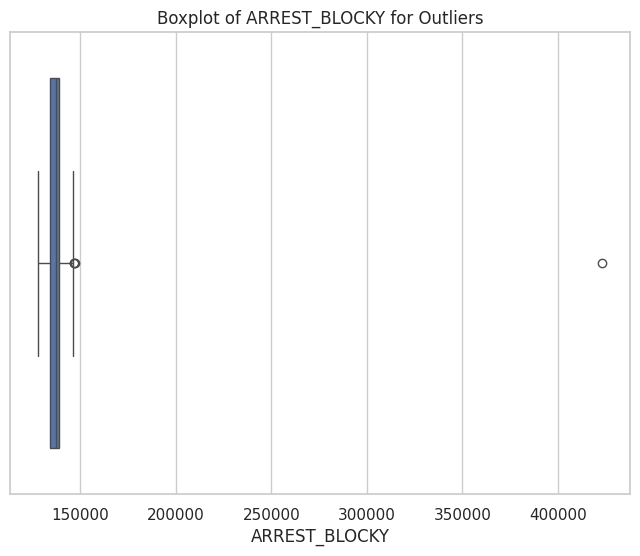


ARREST_BLOCKY column statistics:
 count     12093.000000
mean     136551.352022
std        4533.415194
min      128000.000000
25%      134300.000000
50%      137100.000000
75%      139100.000000
max      422900.000000
Name: ARREST_BLOCKY, dtype: float64


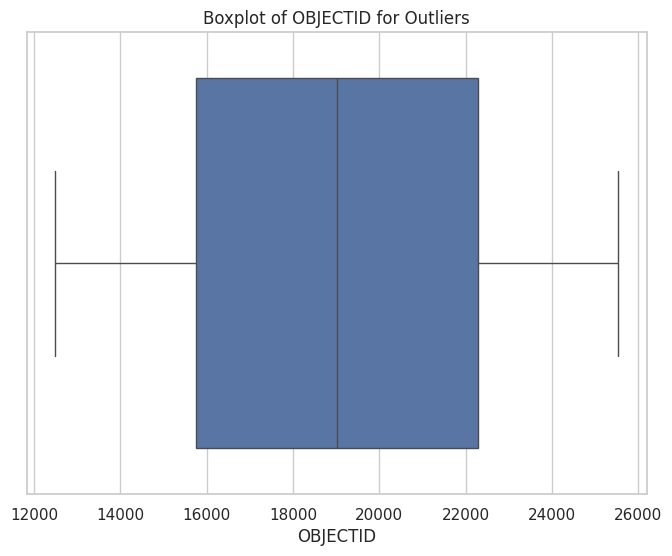


OBJECTID column statistics:
 count    13063.000000
mean     19012.000000
std       3771.107618
min      12481.000000
25%      15746.500000
50%      19012.000000
75%      22277.500000
max      25543.000000
Name: OBJECTID, dtype: float64


In [15]:

#Check for Outliers in Numerical Columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col} for Outliers')
    plt.show()
    print(f"\n{col} column statistics:\n", data[col].describe())


In [16]:

#Check for Inconsistent Categorical Values
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_values = data[col].unique()
    print(f"\nUnique values in '{col}' column:\n", unique_values)



Unique values in 'TYPE' column:
 ['Possession' 'Possession with intent to distribute' 'Distribution'
 'Public consumption' 'Public Consumption' 'Manufacture' 'Cultivation']

Unique values in 'ADULT_JUVENILE' column:
 ['Adult' 'Juvenile' 'Unknown']

Unique values in 'DATETIME' column:
 ['2012/01/01 06:00:00+00' '2012/01/01 09:35:00+00'
 '2012/01/02 19:40:00+00' ... '2021/12/11 05:00:00+00'
 '2021/12/18 05:00:00+00' '2021/12/23 05:00:00+00']

Unique values in 'CCN' column:
 ["b';\\xc8k~\\xa4iJ'" "b't6\\xa0\\xac\\xec`\\xa4'"
 "b'\\xbe\\x1d\\xa7\\xf5\\xffWx'" ... '105e0539b622e4c6'
 '14daeb983691273a' 'f09f73792bd6d544']

Unique values in 'OFFENSE_DISTRICT' column:
 ['5D' '7D' '6D' '4D' '1D' '3D' '2D' 'Unk']

Unique values in 'DEFENDANT_PSA' column:
 ['Out of State' '705' '605' nan '301' '502' '702' '604' '501' '607' '404'
 '402' '602' '701' '302' '105' '601' '102' '603' '308' '401' '708' '507'
 '103' '704' '608' '405' '707' '203' '403' '307' '101' '506' '306' '706'
 '703' '505' '503' '10

In [17]:
# Data Type Validation need for some part
print("\nData Types:\n", data.dtypes)



Data Types:
 TYPE                   object
ADULT_JUVENILE         object
YEAR                    int64
DATETIME               object
CCN                    object
AGE                   float64
OFFENSE_DISTRICT       object
OFFENSE_PSA           float64
OFFENSE_BLOCKX        float64
OFFENSE_BLOCKY        float64
DEFENDANT_PSA          object
DEFENDANT_DISTRICT     object
RACE                   object
ETHNICITY              object
SEX                    object
CATEGORY               object
DESCRIPTION            object
ADDRESS                object
ARREST_BLOCKX         float64
ARREST_BLOCKY         float64
GIS_ID                 object
CREATOR                object
CREATED                object
EDITOR                 object
EDITED                 object
OBJECTID                int64
GLOBALID               object
dtype: object


**Handle missing values (median, mean, and mode).**

In [18]:

print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 TYPE                    0
ADULT_JUVENILE          0
YEAR                    0
DATETIME                0
CCN                   553
AGE                   597
OFFENSE_DISTRICT        0
OFFENSE_PSA            27
OFFENSE_BLOCKX        602
OFFENSE_BLOCKY        602
DEFENDANT_PSA         735
DEFENDANT_DISTRICT    700
RACE                  553
ETHNICITY             553
SEX                   553
CATEGORY                0
DESCRIPTION             0
ADDRESS               582
ARREST_BLOCKX         970
ARREST_BLOCKY         970
GIS_ID                  0
CREATOR                 0
CREATED                 0
EDITOR                  0
EDITED                  0
OBJECTID                0
GLOBALID                0
dtype: int64


In [19]:
# Function to handle missing values by median, mean, or mode
def impute_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            # For categorical columns, use mode
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
        else:
            # For numerical columns, use median or mean based on column characteristics
            median_val = df[col].median()
            mean_val = df[col].mean()

            # Replace missing values with median
            df[col].fillna(median_val, inplace=True)


    return df

# Impute missing values
data_imputed = impute_missing_values(data)

# Verify that there are no missing values left
print("Missing values after imputation:\n", data_imputed.isnull().sum())


Missing values after imputation:
 TYPE                  0
ADULT_JUVENILE        0
YEAR                  0
DATETIME              0
CCN                   0
AGE                   0
OFFENSE_DISTRICT      0
OFFENSE_PSA           0
OFFENSE_BLOCKX        0
OFFENSE_BLOCKY        0
DEFENDANT_PSA         0
DEFENDANT_DISTRICT    0
RACE                  0
ETHNICITY             0
SEX                   0
CATEGORY              0
DESCRIPTION           0
ADDRESS               0
ARREST_BLOCKX         0
ARREST_BLOCKY         0
GIS_ID                0
CREATOR               0
CREATED               0
EDITOR                0
EDITED                0
OBJECTID              0
GLOBALID              0
dtype: int64


**Remove incorrect/incomplete data**




*   Binning Smoothing by mean/median/boundary
*   Regression
*   Clustering


In [20]:

# Remove Incorrect/Incomplete Data
# Assuming `data_imputed` is the DataFrame after imputation
data_cleaned = data_imputed.drop_duplicates()
data_cleaned = data_cleaned.dropna()

print(f"Data after removing duplicates and ensuring no missing values: {data_cleaned.shape[0]} rows remaining.")


Data after removing duplicates and ensuring no missing values: 13063 rows remaining.


Binning Smoothing by mean/median/boundary

In [21]:
# Define bins and labels for AGE column
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']

# Bin the 'AGE' column
data_cleaned['Age_binned'] = pd.cut(data_cleaned['AGE'], bins=bins, labels=labels, include_lowest=True)

# Smoothing by Mean
data_cleaned['AGE_Smooth_Mean'] = data_cleaned.groupby('Age_binned')['AGE'].transform('mean')

# Smoothing by Median
data_cleaned['AGE_Smooth_Median'] = data_cleaned.groupby('Age_binned')['AGE'].transform('median')

# Boundary Smoothing
bin_edges = pd.cut(data_cleaned['AGE'], bins=bins, labels=False, include_lowest=True)
age_min_max = {i: (bins[i], bins[i+1]) for i in range(len(bins)-1)}

def boundary_smooth(val, bin_idx):
    lower_bound, upper_bound = age_min_max[bin_idx]
    return lower_bound if abs(val - lower_bound) < abs(val - upper_bound) else upper_bound

data_cleaned['AGE_Smooth_Boundary'] = data_cleaned.apply(lambda row: boundary_smooth(row['AGE'], bin_edges[row.name]), axis=1)

# Display results
print("\nSample of Mean Smoothing:\n", data_cleaned[['AGE', 'Age_binned', 'AGE_Smooth_Mean']].head())
print("\nSample of Median Smoothing:\n", data_cleaned[['AGE', 'Age_binned', 'AGE_Smooth_Median']].head())
print("\nSample of Boundary Smoothing:\n", data_cleaned[['AGE', 'Age_binned', 'AGE_Smooth_Boundary']].head())


<ipython-input-21-9462d0b306ac>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_cleaned['AGE_Smooth_Mean'] = data_cleaned.groupby('Age_binned')['AGE'].transform('mean')
<ipython-input-21-9462d0b306ac>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_cleaned['AGE_Smooth_Median'] = data_cleaned.groupby('Age_binned')['AGE'].transform('median')



Sample of Mean Smoothing:
     AGE Age_binned  AGE_Smooth_Mean
0  20.0      18-30        23.993483
1  23.0      18-30        23.993483
2  46.0      40-50        45.116145
3  30.0      18-30        23.993483
4  29.0      18-30        23.993483

Sample of Median Smoothing:
     AGE Age_binned  AGE_Smooth_Median
0  20.0      18-30               24.0
1  23.0      18-30               24.0
2  46.0      40-50               45.0
3  30.0      18-30               24.0
4  29.0      18-30               24.0

Sample of Boundary Smoothing:
     AGE Age_binned  AGE_Smooth_Boundary
0  20.0      18-30                   18
1  23.0      18-30                   18
2  46.0      40-50                   50
3  30.0      18-30                   30
4  29.0      18-30                   30


**Reduction:**

1. Dimensionality Reduction

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns for PCA
numerical_cols = ['AGE', 'OFFENSE_BLOCKX', 'OFFENSE_BLOCKY', 'ARREST_BLOCKX', 'ARREST_BLOCKY']  # Example columns
X = data_cleaned[numerical_cols]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to DataFrame for inspection
data_cleaned['PCA1'] = X_pca[:, 0]
data_cleaned['PCA2'] = X_pca[:, 1]

print("\nPCA Components:\n", data_cleaned[['PCA1', 'PCA2']].head())



PCA Components:
        PCA1      PCA2
0  0.383760 -0.118761
1  0.391727 -0.103974
2 -1.812779 -0.457585
3 -0.641285  0.555565
4 -0.900877  1.088986


2. Attribute Subset Selection

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define your features and target variable
X = data_cleaned[numerical_cols]  # Features
y = data_cleaned['TYPE']  # Target variable

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the model and desired number of features
rfe = RFE(model, n_features_to_select=3)  # Selecting top 3 features
rfe = rfe.fit(X, y)

# Get the feature rankings
ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]

print("\nSelected Features:\n", selected_features)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Selected Features:
 Index(['OFFENSE_BLOCKY', 'ARREST_BLOCKX', 'ARREST_BLOCKY'], dtype='object')


3. Numerosity Reduction

In [24]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 10

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)

# Represent data using cluster centroids
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_cols)
print("\nCluster Centers:\n", cluster_centers)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster Centers:
         AGE  OFFENSE_BLOCKX  OFFENSE_BLOCKY  ARREST_BLOCKX  ARREST_BLOCKY
0 -0.363720       -0.851916        1.734571      -0.326905       1.405994
1 -0.433814        1.676142       -0.119356       0.606515      -0.104297
2  1.475347        0.103703       -1.281222       0.036489      -1.007242
3  0.058863       -0.856701        0.629636     105.718101      65.606094
4  1.577028        1.159494       -0.017942       0.407878      -0.022291
5 -0.457346       -1.119751        0.638069      -0.418922       0.505447
6 -0.427447       -0.145191       -1.947976      -0.057527      -1.629200
7  1.833556       -0.819906        0.785745      -0.310552       0.615025
8 -0.471953        0.295662       -1.071977       0.104028      -0.818709
9 -0.344846        0.139463        0.318230       0.043446       0.243643


**Transformation**

In [25]:
print("Columns in DataFrame:\n", data_cleaned.columns)
#this used for below

Columns in DataFrame:
 Index(['TYPE', 'ADULT_JUVENILE', 'YEAR', 'DATETIME', 'CCN', 'AGE',
       'OFFENSE_DISTRICT', 'OFFENSE_PSA', 'OFFENSE_BLOCKX', 'OFFENSE_BLOCKY',
       'DEFENDANT_PSA', 'DEFENDANT_DISTRICT', 'RACE', 'ETHNICITY', 'SEX',
       'CATEGORY', 'DESCRIPTION', 'ADDRESS', 'ARREST_BLOCKX', 'ARREST_BLOCKY',
       'GIS_ID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'OBJECTID',
       'GLOBALID', 'Age_binned', 'AGE_Smooth_Mean', 'AGE_Smooth_Median',
       'AGE_Smooth_Boundary', 'PCA1', 'PCA2', 'Cluster'],
      dtype='object')


In [26]:

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Assuming `data` is already loaded

# Identify categorical and numerical columns
categorical_columns = ['TYPE', 'OFFENSE_DISTRICT', 'RACE', 'ETHNICITY', 'SEX', 'CATEGORY']
numerical_columns = ['AGE', 'OFFENSE_BLOCKX', 'OFFENSE_BLOCKY', 'DEFENDANT_PSA', 'DEFENDANT_DISTRICT', 'ARREST_BLOCKX', 'ARREST_BLOCKY']

# Handle categorical columns with One-Hot Encoding
ohe = OneHotEncoder(sparse=False, drop='first')
for col in categorical_columns:
    if col in data.columns:
        encoded_data = ohe.fit_transform(data[[col]])
        encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out([col]))
        data = pd.concat([data, encoded_df], axis=1).drop(columns=[col])
    else:
        print(f"Column {col} not found in DataFrame")

# Convert problematic columns to numeric and handle errors
data['AGE'] = pd.to_numeric(data['AGE'], errors='coerce')

# Drop rows with NaN values in 'AGE' if needed
data = data.dropna(subset=['AGE'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Nomilization

In [27]:

# Apply normalization to numerical columns
numerical_columns = [col for col in numerical_columns if col in data.columns and pd.api.types.is_numeric_dtype(data[col])]
if numerical_columns:
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
    print("Data after Normalization:\n", data.head())
else:
    print("No valid numerical columns found for normalization.")

Data after Normalization:
   ADULT_JUVENILE  YEAR                DATETIME  \
0          Adult  2012  2012/01/01 06:00:00+00   
1          Adult  2012  2012/01/01 06:00:00+00   
2          Adult  2012  2012/01/01 06:00:00+00   
3          Adult  2012  2012/01/01 09:35:00+00   
4          Adult  2012  2012/01/02 19:40:00+00   

                               CCN       AGE  OFFENSE_PSA  OFFENSE_BLOCKX  \
0                 b';\xc8k~\xa4iJ'  0.031746        501.0        0.537143   
1                 b';\xc8k~\xa4iJ'  0.079365        501.0        0.537143   
2           b't6\xa0\xac\xec`\xa4'  0.444444        707.0        0.537143   
3        b'\xbe\x1d\xa7\xf5\xffWx'  0.190476        605.0        0.742857   
4  b'\xbb\xc0\x8e\x94\x81\xac\xcd'  0.174603        604.0        0.920000   

   OFFENSE_BLOCKY DEFENDANT_PSA DEFENDANT_DISTRICT  ... RACE_U RACE_W  \
0        0.520833  Out of State       Out of State  ...    0.0    0.0   
1        0.520833  Out of State       Out of State  ...    0.0 

Discretization

In [28]:


# Example of discretizing AGE into bins
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
data['AGE_binned'] = pd.cut(data['AGE'], bins=bins, labels=labels, include_lowest=True)

# Example of discretizing OFFENSE_BLOCKX and OFFENSE_BLOCKY into bins
data['OFFENSE_BLOCKX_binned'] = pd.cut(data['OFFENSE_BLOCKX'], bins=5)  # Adjust bin count as needed
data['OFFENSE_BLOCKY_binned'] = pd.cut(data['OFFENSE_BLOCKY'], bins=5)

print(data[['AGE', 'AGE_binned', 'OFFENSE_BLOCKX', 'OFFENSE_BLOCKX_binned', 'OFFENSE_BLOCKY', 'OFFENSE_BLOCKY_binned']].head())


        AGE AGE_binned  OFFENSE_BLOCKX OFFENSE_BLOCKX_binned  OFFENSE_BLOCKY  \
0  0.031746        <18        0.537143            (0.4, 0.6]        0.520833   
1  0.079365        <18        0.537143            (0.4, 0.6]        0.520833   
2  0.444444        <18        0.537143            (0.4, 0.6]        0.140625   
3  0.190476        <18        0.742857            (0.6, 0.8]        0.343750   
4  0.174603        <18        0.920000            (0.8, 1.0]        0.385417   

  OFFENSE_BLOCKY_binned  
0            (0.4, 0.6]  
1            (0.4, 0.6]  
2         (-0.001, 0.2]  
3            (0.2, 0.4]  
4            (0.2, 0.4]  


concept hierarchy for CATEGORY

In [29]:
#we use again our data to use diffrent pandas value

# Load the data
df = pd.read_csv('/content/Marijuana_Arrests.csv')

# Define concept hierarchy for CATEGORY, this is sample sir
category_hierarchy = {
    'Narcotics': ['Narcotics'],
    'Theft': ['Theft', 'Larceny'],
    'Assault': ['Assault', 'Violent Crime'],
    'Property Crime': ['Burglary', 'Theft'],
    'Drug': ['Drug', 'Narcotics'],

}

# Reverse the hierarchy mapping for easy lookup
reverse_category_hierarchy = {v: k for k, values in category_hierarchy.items() for v in values}

# Map detailed categories to broader categories
df['BROAD_CATEGORY'] = df['CATEGORY'].map(lambda x: reverse_category_hierarchy.get(x, 'Other'))

# Define concept hierarchy for TYPE
type_hierarchy = {
    'Possession': 'Drug Offense',
    'Possession with intent to distribute': 'Drug Offense',
    'Assault': 'Violent Crime',
    'Theft': 'Property Crime',
    'Robbery': 'Property Crime',

}

# Map detailed types to broader types
df['BROAD_TYPE'] = df['TYPE'].map(lambda x: type_hierarchy.get(x, 'Other'))

# Display results
df[['CATEGORY', 'BROAD_CATEGORY', 'TYPE', 'BROAD_TYPE']].head()


,CATEGORY,BROAD_CATEGORY,TYPE,BROAD_TYPE
0,Narcotics,Drug,Possession,Drug Offense
1,Narcotics,Drug,Possession,Drug Offense
2,Narcotics,Drug,Possession,Drug Offense
3,Narcotics,Drug,Possession,Drug Offense
4,Narcotics,Drug,Possession with intent to distribute,Drug Offense


# **Data Mining Part**

TYPE_encoded          1.000000
YEAR                  0.089736
RACE                  0.083146
ARREST_BLOCKY         0.067362
OFFENSE_BLOCKY        0.064087
DEFENDANT_DISTRICT    0.014170
DEFENDANT_PSA         0.008484
SEX                  -0.011937
ETHNICITY            -0.051987
DESCRIPTION          -0.094627
AGE                  -0.102429
OFFENSE_PSA          -0.111302
OFFENSE_DISTRICT     -0.111557
ARREST_BLOCKX        -0.135253
OFFENSE_BLOCKX       -0.135985
ADULT_JUVENILE             NaN
CATEGORY                   NaN
Name: TYPE_encoded, dtype: float64


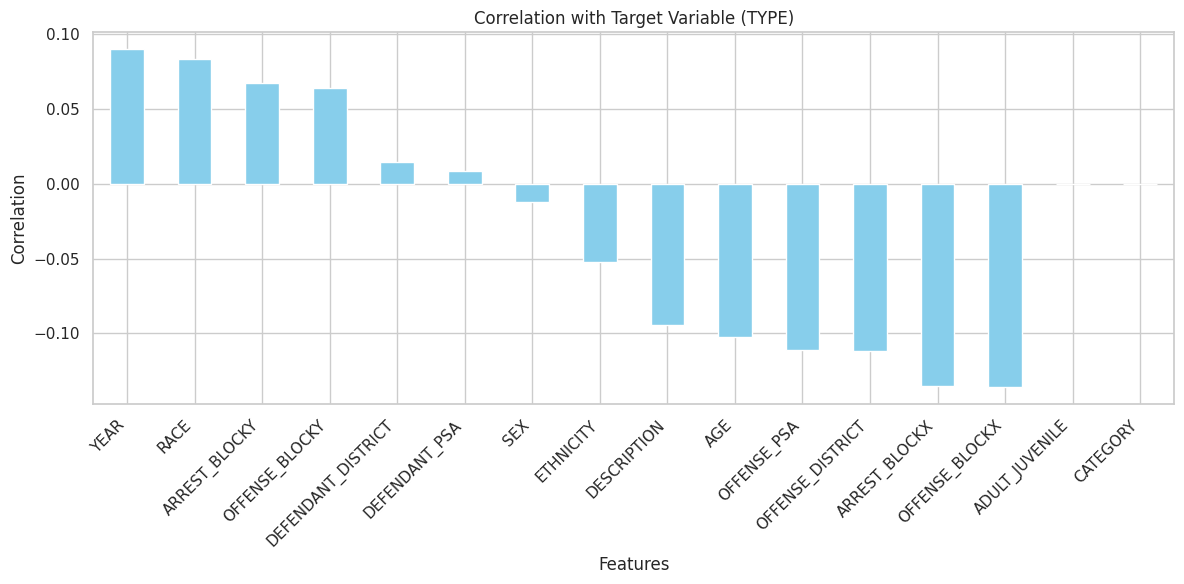

In [30]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('/content/Marijuana_Arrests.csv')

# Drop unnecessary columns
columns_to_drop = ['CCN', 'GIS_ID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'OBJECTID', 'GLOBALID']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Encode categorical columns
categorical_columns = ['ADULT_JUVENILE', 'OFFENSE_DISTRICT', 'DEFENDANT_PSA', 'DEFENDANT_DISTRICT', 'RACE', 'ETHNICITY', 'SEX', 'CATEGORY', 'DESCRIPTION']

# Apply Label Encoding to categorical columns
for col in categorical_columns:
    if col in data.columns:
        label_encoder = LabelEncoder()
        data[col] = label_encoder.fit_transform(data[col].astype(str))

# Label encoding for the target variable
label_encoder = LabelEncoder()
data['TYPE_encoded'] = label_encoder.fit_transform(data['TYPE'])

# Drop rows with missing values for correlation calculation
data_clean = data.dropna()

# Check numeric columns after encoding
numeric_columns = data_clean.select_dtypes(include=['number']).columns

# Calculate correlation matrix
corr_matrix = data_clean[numeric_columns].corr()

# Extract correlation with the target variable
corr_with_target = corr_matrix['TYPE_encoded'].sort_values(ascending=False)
print(corr_with_target)

# Plot correlation with the target variable
plt.figure(figsize=(12, 6))
corr_with_target.drop('TYPE_encoded').plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable (TYPE)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Evaluate resulting model/patterns

In [31]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data
data = pd.read_csv('/content/Marijuana_Arrests.csv')

# Drop unnecessary columns
columns_to_drop = ['CCN', 'GIS_ID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'OBJECTID', 'GLOBALID']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Convert DATETIME column to numeric format (e.g., timestamp)
if 'DATETIME' in data.columns:
    data['DATETIME'] = pd.to_datetime(data['DATETIME'], errors='coerce').astype(int) / 10**9  # Convert to seconds since epoch

# Drop rows with missing values
data = data.dropna()

# Encode categorical columns
categorical_columns = ['ADULT_JUVENILE', 'OFFENSE_DISTRICT', 'DEFENDANT_PSA', 'DEFENDANT_DISTRICT', 'RACE', 'ETHNICITY', 'SEX', 'CATEGORY', 'DESCRIPTION', 'ADDRESS']
for col in categorical_columns:
    if col in data.columns:
        label_encoder = LabelEncoder()
        data[col] = label_encoder.fit_transform(data[col].astype(str))

# Label encode the target variable
label_encoder = LabelEncoder()
data['TYPE_encoded'] = label_encoder.fit_transform(data['TYPE'])

# Define features and target variable
X = data.drop(columns=['TYPE', 'TYPE_encoded'])
y = data['TYPE_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9914705882352941

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      0.99      0.98       449
           2       0.00      0.00      0.00         2
           3       1.00      0.99      1.00      1582
           4       0.99      0.99      0.99      1069
           5       1.00      1.00      1.00        60
           6       0.98      0.98      0.98       237

    accuracy                           0.99      3400
   macro avg       0.71      0.71      0.71      3400
weighted avg       0.99      0.99      0.99      3400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Experiment with Different Parameter Settings

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nBest Model Classification Report:\n", classification_report(y_test, y_pred_best))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Accuracy: 0.9929411764705882

Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      1.00      0.98       449
           2       0.00      0.00      0.00         2
           3       1.00      0.99      1.00      1582
           4       0.99      1.00      0.99      1069
           5       1.00      1.00      1.00        60
           6       0.98      0.98      0.98       237

    accuracy                           0.99      3400
   macro avg       0.71      0.71      0.71      3400
weighted avg       0.99      0.99      0.99      3400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Experiment with Multiple Alternative Methods

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Initialize models
log_reg = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

# Train and evaluate each model
for model in [log_reg, svm, gbc]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit


Model: LogisticRegression
Accuracy: 0.7644117647058823
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.71      0.71      0.71       449
           2       0.00      0.00      0.00         2
           3       0.77      0.89      0.83      1582
           4       0.79      0.64      0.71      1069
           5       0.69      0.57      0.62        60
           6       0.73      0.65      0.68       237

    accuracy                           0.76      3400
   macro avg       0.53      0.49      0.51      3400
weighted avg       0.76      0.76      0.76      3400


Model: SVC
Accuracy: 0.8973529411764706
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.73      0.79      0.76       449
           2       0.00      0.00      0.00         2
           3       0.91      0.98      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: GradientBoostingClassifier
Accuracy: 0.9985294117647059
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99       449
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00      1582
           4       1.00      1.00      1.00      1069
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00       237

    accuracy                           1.00      3400
   macro avg       0.71      0.71      0.71      3400
weighted avg       1.00      1.00      1.00      3400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Improve Preprocessing and Feature Generation

In [34]:
# Feature engineering: binning the 'AGE' column
data['AGE_binned'] = pd.cut(data['AGE'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '60+'])

# Create interaction features (e.g., combining 'AGE' and 'OFFENSE_DISTRICT')
data['AGE_OFFENSE_DISTRICT'] = data['AGE'].astype(str) + '_' + data['OFFENSE_DISTRICT'].astype(str)

# Label encode the new interaction and binned features
for col in ['AGE_binned', 'AGE_OFFENSE_DISTRICT']:
    if col in data.columns:
        label_encoder = LabelEncoder()
        data[col] = label_encoder.fit_transform(data[col].astype(str))

# Update the feature set
X = data.drop(columns=['TYPE', 'TYPE_encoded', 'AGE'])  # Drop the original 'AGE'
y = data['TYPE_encoded']

# Perform the train-test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the best model again with new features
best_model.fit(X_train, y_train)
y_pred_new_features = best_model.predict(X_test)

# Evaluate the model with new features
print("Accuracy with New Features:", accuracy_score(y_test, y_pred_new_features))
print("\nClassification Report with New Features:\n", classification_report(y_test, y_pred_new_features))


Accuracy with New Features: 0.99

Classification Report with New Features:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.97       449
           2       0.00      0.00      0.00         2
           3       1.00      0.99      1.00      1582
           4       0.99      0.99      0.99      1069
           5       1.00      1.00      1.00        60
           6       0.98      0.97      0.98       237

    accuracy                           0.99      3400
   macro avg       0.70      0.71      0.71      3400
weighted avg       0.99      0.99      0.99      3400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Increase Amount or Quality of Training Data , we not add this part, because another data column not same this dataset

# **Evaluation and Interpretation:**
○ Results: Present the findings of your analysis.

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import joblib


In [36]:

from sklearn.model_selection import train_test_split


# Load the dataset
data = pd.read_csv('/content/Marijuana_Arrests.csv')

# Drop unnecessary columns
columns_to_drop = ['CCN', 'GIS_ID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'OBJECTID', 'GLOBALID']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Handling missing values by filling with mean for numerical columns and mode for categorical columns
for column in data.select_dtypes(include=['number']).columns:
    data[column].fillna(data[column].mean(), inplace=True)

for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Label encoding for categorical variables
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['TYPE', 'ADULT_JUVENILE', 'OFFENSE_DISTRICT', 'DEFENDANT_DISTRICT', 'RACE', 'SEX', 'CATEGORY']

for col in categorical_cols:
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])

# Select only the relevant columns for the model
X = data[['AGE', 'OFFENSE_BLOCKX', 'OFFENSE_BLOCKY', 'TYPE_encoded', 'RACE_encoded', 'SEX_encoded', 'OFFENSE_DISTRICT_encoded']]
y = data['TYPE_encoded']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardizing numerical features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model Building

In [37]:


# Train a RandomForest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_test_scaled)

# Save the model for future use
joblib.dump(model, 'Police_Arrest_Predictor.pkl')


['Police_Arrest_Predictor.pkl']

Model Evaluation

In [38]:
#Model Evaluation
# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 99.96%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[ 355    0    0    0    0]
 [   0 1227    0    0    0]
 [   0    0  801    0    0]
 [   0    0    0   48    1]
 [   0    0    0    0  181]]


Cross-Validation and Hyperparameter Tuning

In [39]:
# Perform cross-validation to validate model consistency
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cross_val_scores) * 100:.2f}%")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy: 99.92%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best Model Accuracy: 99.92%


Visualizing Feature Importance (optional)

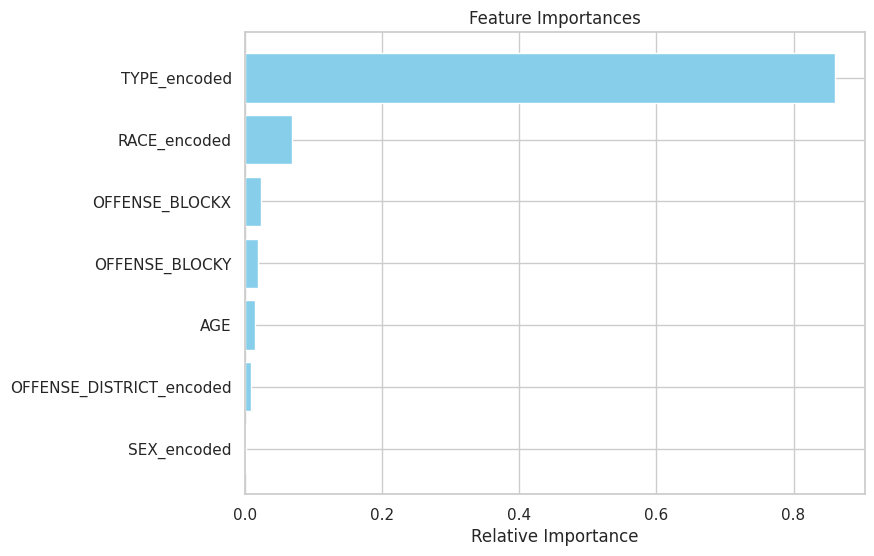

In [40]:
# Feature importance visualization
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


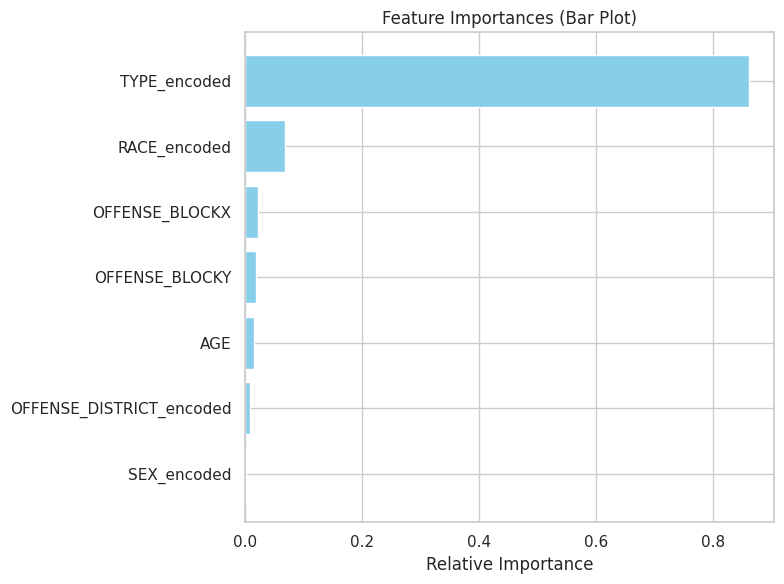

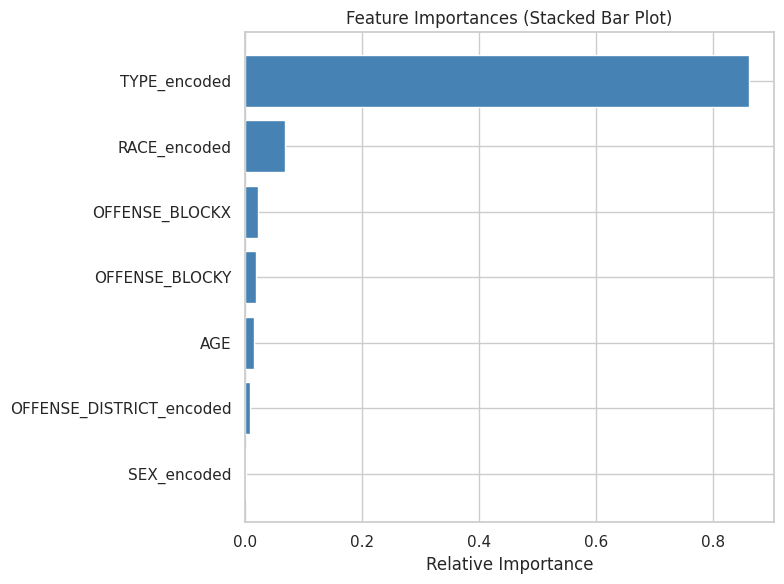

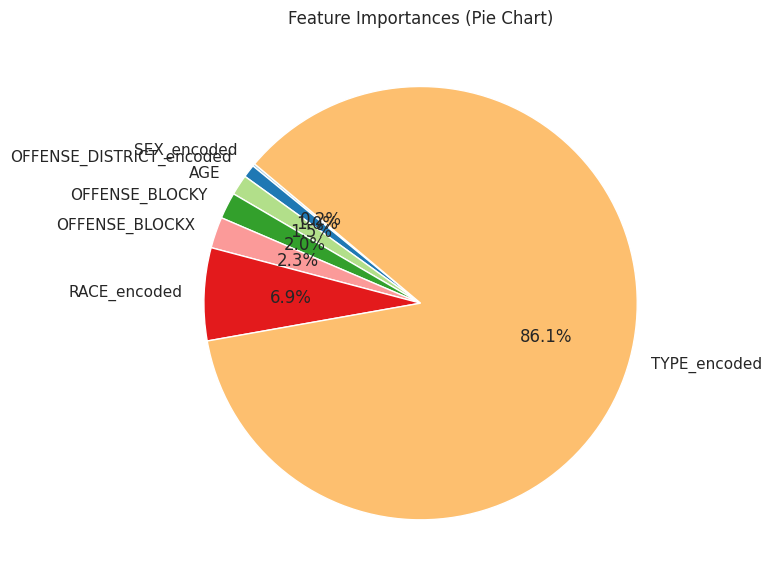

In [41]:


# Load your model
import joblib
model = joblib.load('Police_Arrest_Predictor.pkl')

# Feature importance extraction
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

# Plotting Feature Importances

# Horizontal Bar Plot
plt.figure(figsize=(8, 6))
plt.title('Feature Importances (Bar Plot)')
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

# Horizontal Stacked Bar Plot
plt.figure(figsize=(8, 6))
plt.title('Feature Importances (Stacked Bar Plot)')
plt.barh(feature_names[indices], importances[indices], color='steelblue')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.title('Feature Importances (Pie Chart)')
plt.pie(importances[indices], labels=[feature_names[i] for i in indices], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.tight_layout()
plt.show()
